In [56]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable)
import socket
print(socket.gethostname())
import os
os.chdir("/home/icb/alioguz.can/projects/campa_pt")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/icb/alioguz.can/miniconda3/envs/campa_pt/bin/python
gpusrv35.scidom.de


In [57]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
TF_ENABLE_ONEDNN_OPTS=0

In [58]:
from pathlib import Path
from campa.tl import (
    Cluster,
    Estimator,
    TorchEstimator,
    Predictor,
    TorchPredictor,
    Experiment,
    TorchExperiment,
    ModelComparator,
    run_experiments,
    run_torch_experiments
)
from campa.data import MPPData
from campa.utils import init_logging
from campa.constants import campa_config
# init logging with level INFO=20, WARNING=30
init_logging(level=30)
# read correct campa_config -- created with setup.ipynb
CAMPA_DIR = Path.cwd()
campa_config.config_fname = CAMPA_DIR / "notebooks/params/campa.ini"
print(campa_config)

Reading config from /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini
CAMPAConfig (fname: /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini)
EXPERIMENT_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments
BASE_DATA_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_data
CO_OCC_CHUNK_SIZE: 10000000.0
data_config/exampledata: /home/icb/alioguz.can/projects/campa_pt/notebooks/params/ExampleData_constants.py



In [48]:
# import tensorflow as tf
# from tensorflow.keras import backend as K
# import torch
# torch.cuda.empty_cache()
# # Clear the current session
# K.clear_session()

# # Optionally, reset the default graph
# tf.compat.v1.reset_default_graph()

In [17]:
# get Experiments from config
exps = Experiment.get_experiments_from_config("notebooks/params/example_experiment_params.py")

In [23]:
run_experiments(exps, mode="trainval")

Running experiment for ['CondVAE_pert-CC', 'VAE', 'MPPleiden'] with mode trainval
Training model for CondVAE_pert-CC
4/4 [==============================] - 3s 147ms/step - loss: 5459.4097 - decoder_loss: 5459.3599 - latent_loss: 0.0494 - decoder_mean_squared_error: 0.8259 - latent_kl_loss: 0.0488 - val_loss: 5171.1284 - val_decoder_loss: 5171.0884 - val_latent_loss: 0.0398 - val_decoder_mean_squared_error: 0.6943 - val_latent_kl_loss: 0.0398
Evaluating model for CondVAE_pert-CC
319/319 [==============================] - 1s 3ms/step
Clustering results for CondVAE_pert-CC
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/CondVAE_pert-CC/results_epoch001/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Training model for VAE
4/4 [==============================] - 2s 116ms/step - loss: 5591.1040 - decoder_loss: 5591.0972 - latent_loss: 0.0072 - decoder_mean_squared_error: 0.8843 - latent_kl_loss: 0.0070 - val_loss: 5600.6216 - val_decoder_loss: 5600.6162 - val_latent_loss: 0.0055 - val_decoder_mean_squared_error: 0.8526 - val_latent_kl_loss: 0.0055
Evaluating model for VAE
319/319 [==============================] - 1s 2ms/step
Clustering results for VAE
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/VAE/results_epoch001/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Clustering results for MPPleiden
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/MPPleiden/results_epoch000/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'labels', 'conditions', 'mpp', 'clustering'].


In [6]:
exp = exps[1]
print("Experiment name:", exp.name)
print("Experiment is stored in:", exp.full_path)

Experiment name: CondVAE_pert-CC
Experiment is stored in: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/test/CondVAE_pert-CC


In [7]:
est = Estimator(exps[1])

2025-01-17 09:26:40.194302: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-01-17 09:26:40.245195: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2025-01-17 09:26:40.488259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
print(Estimator(exps[0]).model.summary)

Model: "VAEModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 3, 3, 34)]   0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 3, 3, 32)     1120        ['input_6[0][0]']                
                                                                                                  
 flatten_1 (Flatten)            (None, 288)          0           ['conv2d_1[0][0]']               
                                                                                                  
 dense_5 (Dense)                (None, 32)           9248        ['flatten_1[0][0]']              
                                                                                           

In [9]:
_ = est.train_model()

4/4 [==============================] - 9s 915ms/step - loss: 5151.8740 - decoder_loss: 5151.8628 - latent_loss: 0.0116 - decoder_mean_squared_error: 0.7127 - latent_kl_loss: 0.0116 - val_loss: 5232.7085 - val_decoder_loss: 5232.6943 - val_latent_loss: 0.0143 - val_decoder_mean_squared_error: 0.7151 - val_latent_kl_loss: 0.0143


In [10]:
pred_torch = Predictor(exps[1])
pred_torch.evaluate_model()

319/319 [==============================] - 0s 1ms/step


In [11]:
cl = Cluster.from_exp_split(exps[1])
cl.create_clustering()

In [24]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")
print("Experiment name:", torch_exps[0].name)
print("Experiment is stored in:", torch_exps[0].full_path)

Experiment name: VAE
Experiment is stored in: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE


In [12]:
est_torch = TorchEstimator(torch_exps[1])
print(est_torch.model)
est_torch.model.total_trainable_params()

VAEModelTorch(
  (condition_encoder_latent): Sequential(
    (0): Linear(in_features=14, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (encoder): Sequential(
    (0): Conv2d(44, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=288, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=16, bias=True)
    (6): ReLU()
  )
  (latent): Linear(in_features=16, out_features=32, bias=True)
  (condition_encoder_decoder): Sequential(
    (0): Linear(in_features=14, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=26, out_features=34, bias=True)
  )
)
13198


In [13]:
est_torch.train_model()

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]/home/icb/alioguz.can/miniconda3/envs/campa_pt/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py:172: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)
Epochs: 100%|██████████| 1/1 [00:09<00:00,  9.49s/it]


{'epoch': 0,
 'loss': 4279.7982177734375,
 'val_loss': 4335.97802734375,
 'decoder_loss': 4279.794372558594,
 'latent_loss': 0.003947414690628648}

In [30]:
pred_torch = TorchPredictor(torch_exps[1])
pred_torch.evaluate_model()

/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.est.model.encoder(torch.tensor(x)) # because mpp has shape batch_size x neighbors x neighbors x channels
/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.est.model.encoder(torch.tensor(x)) # because mpp has shape batch_size x neighbors x neighbors x channels


In [8]:
results_folder = os.path.join(pred_torch.exp.full_path, f"results_epoch{pred_torch.est.epoch:03d}")
print("Results folder", results_folder)
print(os.listdir(results_folder))

Results folder /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/test/VAE/results_epoch000
['val', 'val_imgs']


In [9]:
val_mpp = MPPData.from_data_dir(os.path.join(results_folder, "val"), data_config="ExampleData")
print(val_mpp)
print(val_mpp.obj_ids)

MPPData for ExampleData (123 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['y', 'x', 'obj_ids', 'labels', 'conditions', 'mpp', 'latent'].
[261509 343819 280871 221207 345908 248082 343842 221207 343842 343819
 280871 343842 248082 248082 334505 343842 343819 345908 343842 343819
 345908 343842 343819 343842 280871 248082 343842 343842 334505 343819
 343819 343819 343842 261509 343842 343842 345908 280871 343819 343842
 343819 343819 343842 280871 248082 221207 221207 343819 261509 343819
 334505 343842 334505 343842 334505 261509 248082 343819 343842 334505
 221207 334505 280871 261509 248082 248082 261509 343842 343842 248082
 248082 343842 280871 343819 345908 261509 343842 221207 343842 343819
 343819 221207 261509 221207 343819 343842 334505 345908 343842 221207
 221207 343819 221207 221207 334505 248082 221207 221207 221207 343819
 248082 261509 343842 343819 248082 343819 334505 221207 334505 221207
 343819 221207 343819 343819 221207 280871 343842 280871 343842 248082


In [14]:
cl = Cluster.from_exp_split(torch_exps[1])

In [15]:
print(cl.config["leiden_resolution"])
cl.create_clustering()

0.2


AssertionError: 

In [26]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")

In [27]:
run_torch_experiments(torch_exps, mode="trainval")

Running experiment for ['VAE', 'CondVAE_pert-CC', 'MPPleiden'] with mode trainval
Training model for VAE


Epochs: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


Evaluating model for VAE
Clustering results for VAE


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Training model for CondVAE_pert-CC


Epochs: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]
/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.est.model.encoder(torch.tensor(x)) # because mpp has shape batch_size x neighbors x neighbors x channels


Evaluating model for CondVAE_pert-CC


/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.est.model.encoder(torch.tensor(x)) # because mpp has shape batch_size x neighbors x neighbors x channels


Clustering results for CondVAE_pert-CC


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Clustering results for MPPleiden


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'labels', 'conditions', 'mpp', 'clustering'].


In [4]:
import numpy as np

In [60]:
# get saved experiments from dir
exps = Experiment.get_experiments_from_dir("tf_test")
comp = ModelComparator(exps)

Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/CondVAE_pert-CC/results_epoch001/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/CondVAE_pert-CC/results_epoch001/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/VAE/results_epoch001/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/VAE/results_epoch001/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/MPPleiden/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/tf_test/MPPleiden/results_epoch000/val_imgs/clustering.npy


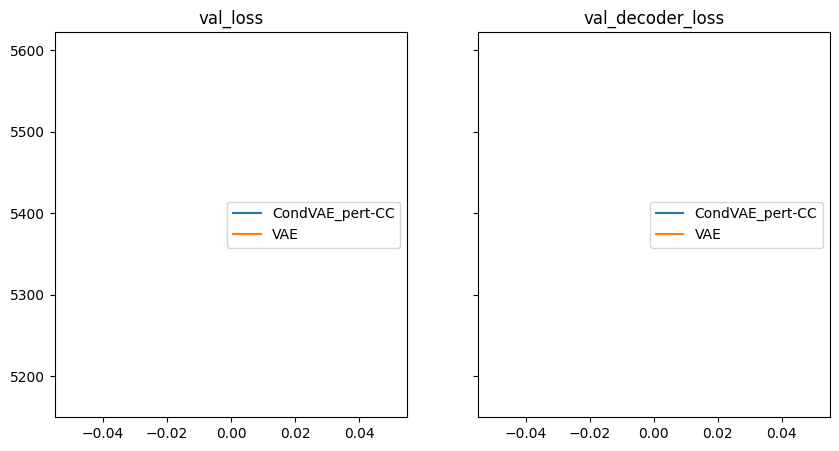

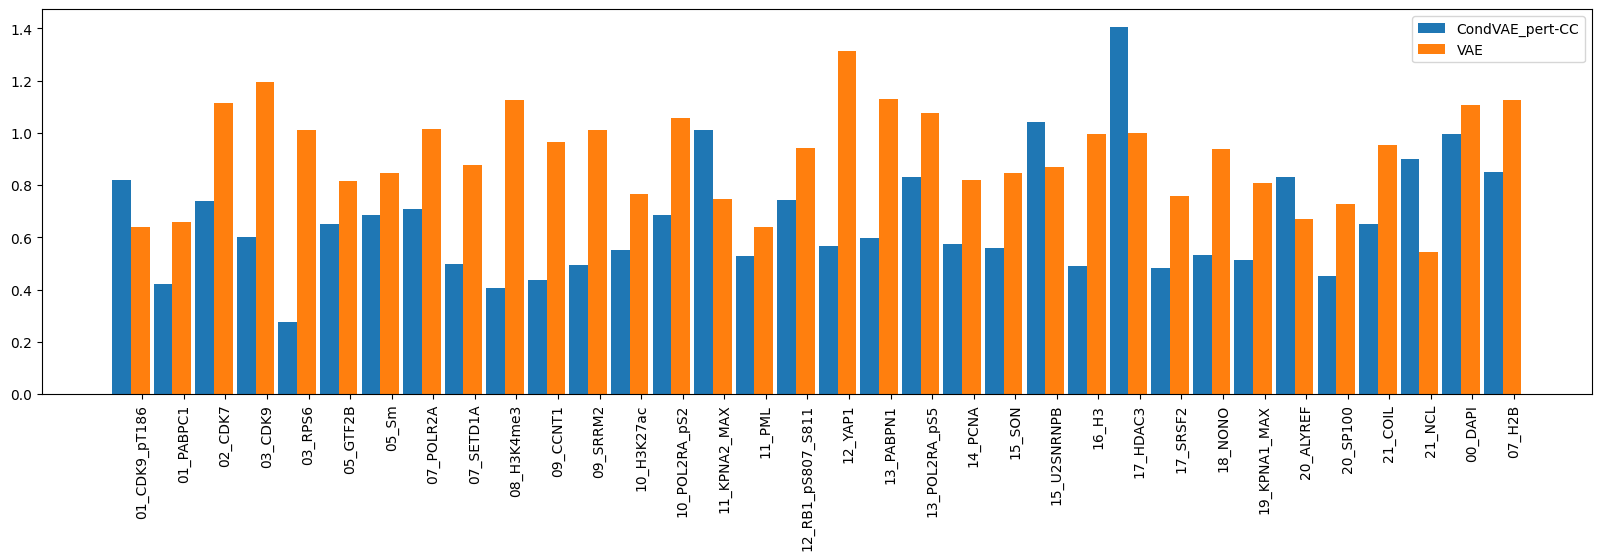

In [12]:
comp.plot_history(values=["val_loss", "val_decoder_loss"])
comp.plot_final_score(score="val_decoder_loss", fallback_score="val_loss", save_prefix="decoder_loss_")
comp.plot_per_channel_mse()

In [13]:
comp.plot_predicted_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)

In [69]:
# get saved experiments from dir
exps = Experiment.get_experiments_from_dir("torch_test")
comp = ModelComparator(exps)

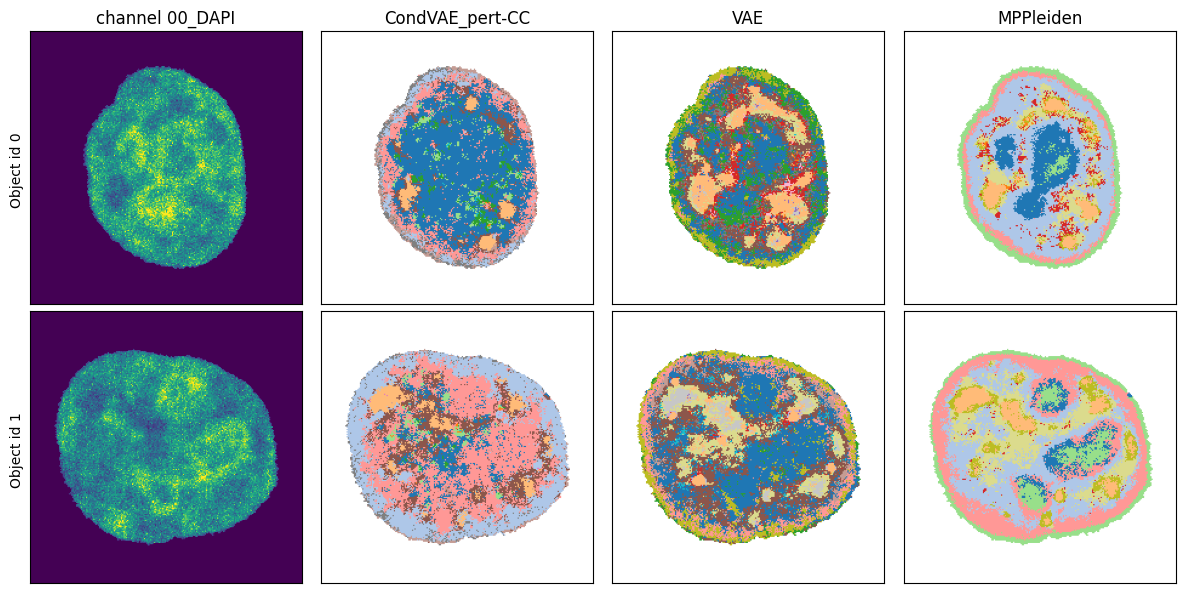

In [70]:
comp.plot_cluster_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
    img_channel="00_DAPI",
)

In [ ]:
mpp_data = MPPData.from_data_dir("/home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val_imgs", data_config="ExampleData", optional_keys=["decoder", "latent"])
print(mpp_data)
print("latent: ",mpp_data.data("latent").shape)
print("decoder: ",mpp_data.data("decoder").shape)